In [1]:
%matplotlib widget

# Xsuite example for a secondary beam line
Based on: https://gitlab.cern.ch/acc-models/acc-models-ea/-/blob/en-ea-le/H6/scenarios/positive-120gev-fm-focus/


In [3]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

### Load lattice and strengths

In [4]:
# Load lattice and strengths
env = xt.load_madx_lattice('h6fm04.seq')
env.vars.load_madx('h6-fm.str')

# Select the line
line = env['h6']

# Associate a reference particle
line.particle_ref = xt.Particles(p0c=120e9, mass0=xt.PROTON_MASS_EV)

### Survey

In [7]:
sv = line.survey()

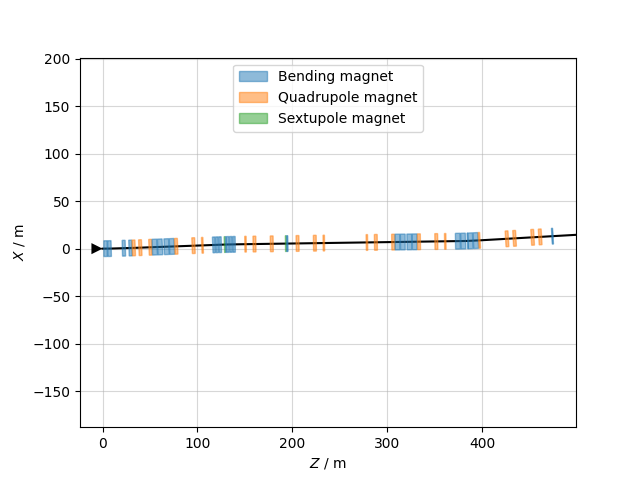

In [11]:
sv.plot(projection='ZX')

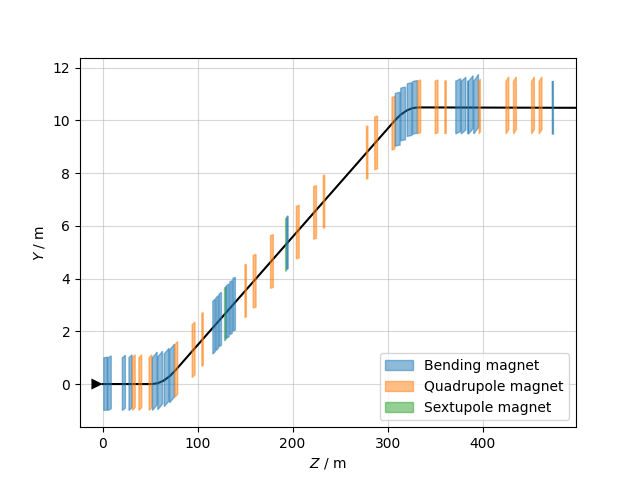

In [10]:
sv.plot(projection='ZY', axis=None, element_width=2)

### Inspect the lattice using tables

In [14]:
tt = line.get_table(attr=True)
tt_bend = tt.rows[tt.element_type=='Bend']
tt_quad = tt.rows[tt.element_type=='Quadrupole']

In [15]:
tt_bend.cols['s', 'length', 'angle_rad', 'k0l', 'rot_s_rad'].show()

name                       s        length     angle_rad           k0l     rot_s_rad
mtn.x0400003         1.35002       3.60002       -0.0126       -0.0126  -0.000261799
mtn.x0400007         5.55007       3.60002       -0.0126       -0.0126  -0.000266356
msn.x0410022         20.8501           3.2       -0.0056       -0.0056  -0.000270954
msn.x0410029         27.8301       3.20001        -0.007        -0.007  -0.000273011
mbnv.x0410055        52.4851       5.00002     -0.010254     -0.010254       1.57052
mbnv.x0410061        58.1452       5.00002     -0.010254     -0.010254       1.57052
mbnv.x0410067        64.9552       5.00002     -0.010254     -0.010254       1.57052
mbnv.x0410073        70.6153       5.00002     -0.010254     -0.010254       1.57052
mbxhc.x0410117        116.17           2.5     0.0039634     0.0039634  -0.000275377
mbxhc.x0410121        119.47           2.5     0.0039634     0.0039634  -0.000436564
mbxhc.x0410124        122.77           2.5     0.0039634     0.00

In [16]:
tt_quad.cols['s', 'length', 'k1l', 'rot_s_rad'].show()

name                     s        length           k1l     rot_s_rad
qsl.x0410033       31.4201             3     0.0648872             0
qnl.x0410040       38.2851          2.99    -0.0199256             0
qnl.x0410050       48.9451          2.99    -0.0277722             0
qnl.x0410078       76.1653          2.99    -0.0309024             0
qnl.x0410096       94.3933          2.99      0.073996             0
qts.x0410106       104.589          1.49    -0.0523803             0
qts.x0410151       150.021          1.49    -0.0523803             0
qnl.x0410160       158.717          2.99     0.0740119             0
qnl.x0410178       176.945          2.99    -0.0310116             0
qnl.x0410206       204.165          2.99    -0.0310116             0
qnl.x0410224       222.393          2.99     0.0740119             0
qts.x0410234       232.589          1.49    -0.0523803             0
qts.x0410279       278.021          1.49    -0.0523803             0
qnl.x0410288       286.717        

In [18]:
# Access table with regular expressions
tt_quad.rows['qts.*'].cols['s', 'length', 'k1l', 'rot_s_rad'].show()

name                     s        length           k1l     rot_s_rad
qts.x0410106       104.589          1.49    -0.0523803             0
qts.x0410151       150.021          1.49    -0.0523803             0
qts.x0410234       232.589          1.49    -0.0523803             0
qts.x0410279       278.021          1.49    -0.0523803             0
qts.x0410362       360.589          1.49    -0.0531526             0
qts.x0410397       396.521          1.49     0.0188032             0


### Inspection of knobs and element properties

In [20]:
# Information about one element
line.info('qts.x0410279')

Element of type:  Quadrupole
k1                  -0.03515453708625                vars['kq6']
k1s                 0.0                              None       
length              1.49                             None       
num_multipole_kicks 0                                None       
order               5                                None       
inv_factorial_order 0.008333333333333333             None       
knl                 [0. 0. 0. 0. 0. 0.]              None       
ksl                 [0. 0. 0. 0. 0. 0.]              None       
edge_entry_active   0                                None       
edge_exit_active    0                                None       
_sin_rot_s          -999.0                           None       
_cos_rot_s          -999.0                           None       
_shift_x            0.0                              None       
_shift_y            0.0                              None       
_shift_s            0.0                              None    

In [21]:
# Information about one knob
line.info('kq6')

#  vars['kq6']._get_value()
   vars['kq6'] = -0.03515453708625

#  vars['kq6']._expr is None

#  vars['kq6']._find_dependant_targets()
   element_refs['qts.x0410279'].k1
   element_refs['qts.x0410234'].k1
   element_refs['qts.x0410151'].k1
   element_refs['qts.x0410106'].k1
   element_refs['q6d'].k1

